In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequalityN.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#output values only contains no. from 3-9
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [6]:
# a mapping dictionary that maps the quality values from 0-6
quality_mapping = {3:0,
                    4:1,
                    5:2,
                    6:3,
                    7:4,
                    8:5,
                    9:6}
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [7]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,3
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,3
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,3


In [8]:
df.shape

(6497, 13)

In [9]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
df = df.fillna(value=df.mean())

In [11]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#using sample with frac=1 to shuffle the dataset
#reset the index after shuffling
df = df.sample(frac=1).reset_index(drop= True)

#selecting first 1000 rows for training set
df_train = df.head(1000)

#selecting last 600 rows for testing/validation
df_test = df.tail(600)


In [13]:
from sklearn import tree
from sklearn import metrics

#intialize decesion tree classifier class
#with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth =3)

In [14]:
features = df.columns[1:-1]
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [15]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


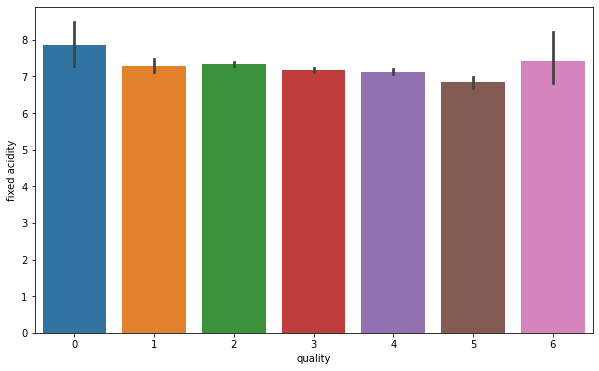

In [16]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

#so should we drop this column??

In [17]:
#train te model on the provided features
# and mapped the quality from before
clf.fit(df_train[features],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [18]:
# generate prediction on the training set
train_predictions = clf.predict(df_train[features])

# generate prediction on the testing set
test_predictions = clf.predict(df_test[features])

# calculate the accuracy of the predictions on the train data set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

# calculate the accuracy of the predictions on the test data set
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [19]:
print("train accuracy {}".format(train_accuracy))
print("test accuracy {}".format(test_accuracy))

train accuracy 0.552
test accuracy 0.48833333333333334


In [20]:
#increasing the depth to 7
clf = tree.DecisionTreeClassifier(max_depth =7)
clf.fit(df_train[features],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [21]:
print("train accuracy {}".format(train_accuracy))
print("test accuracy {}".format(test_accuracy))
#performance decreased in test set, issue of overfitting is detected

train accuracy 0.552
test accuracy 0.48833333333333334


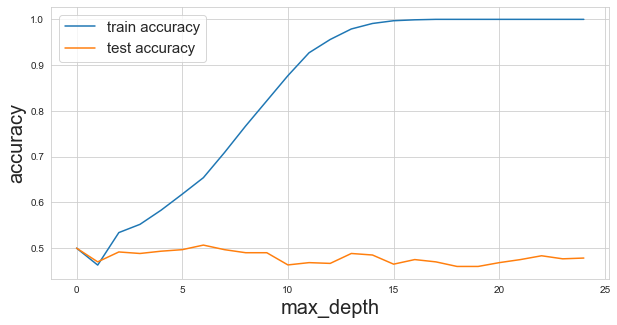

In [22]:
#initailizing the list to store train and test accuracies
# we start from 50%
test_accuracies = [0.5]
train_accuracies = [0.5]


#iterating over few depth
for i in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(df_train[features],df_train.quality)
    
    # generate prediction on the training set
    train_predictions = clf.predict(df_train[features])
    
    # generate prediction on the testing set
    test_predictions = clf.predict(df_test[features])
    # calculate the accuracy of the predictions on the train data set
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    # calculate the accuracy of the predictions on the test data set
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    
    #appened accurarcies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    

#plotting
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label="test accuracy")
plt.legend(loc ="upper left",prop ={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

<H2>Weeee...Woooo....Weeee...Woooo IT'S OVERFITTING!!!!!</H2>

![Logo](https://i.pinimg.com/originals/01/60/2f/01602f12066a718eee238358aeea94c2.jpg)

## Simple KFold Cross Validation

In [23]:
from sklearn import model_selection

In [24]:
df_new = df_train
#create a new column called kfold and fill it with -1
df_new["kfold"]=-1
df_new = df_new.sample(frac=1).reset_index(drop=True)
kf = model_selection.KFold(n_splits=6)

<ipython-input-24-d526ecee3799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["kfold"]=-1


In [25]:
#fill the new kfold column
for fold,(trn_,val_) in enumerate(kf.split(X=df_new)):
    df_new.loc[val_,'kfold'] =fold
df.to_csv("train_folds.csv",index=False)

In [26]:
df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,white,7.1,0.14,0.33,1.00,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,3,0
1,red,7.1,0.48,0.28,2.80,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,2,0
2,white,7.5,0.26,0.52,13.20,0.047,64.0,179.0,0.99820,3.10,0.46,9.0,2,0
3,white,6.4,0.32,0.26,7.90,0.050,53.0,180.0,0.99514,3.14,0.50,9.6,2,0
4,white,6.5,0.29,0.31,1.70,0.035,24.0,79.0,0.99053,3.27,0.69,11.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,white,7.1,0.27,0.24,12.60,0.044,48.0,118.0,0.99726,3.04,0.56,10.0,4,5
996,white,6.7,0.47,0.29,4.75,0.034,29.0,134.0,0.99056,3.29,0.46,13.0,4,5
997,white,7.6,0.29,0.58,17.50,0.041,51.0,225.0,0.99970,3.16,0.66,9.5,3,5
998,white,7.3,0.21,0.33,1.00,0.037,66.0,144.0,0.99230,3.11,0.52,10.2,3,5


In [27]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_new["kfold"])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

## Stratified KFold Cross Validation

In [28]:
df_new = df_train
#create a new column called kfold and fill it with -1
df_new["kfold"]=-1
y = df_new.quality.values
df_new = df_new.sample(frac=1).reset_index(drop=True)
kf = model_selection.StratifiedKFold(n_splits=6)

<ipython-input-28-22d88edfaa56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["kfold"]=-1


In [29]:
#fill the new kfold column
for fold,(trn_,val_) in enumerate(kf.split(X=df_new,y=y)):
    df_new.loc[val_,'kfold'] =fold
df_new.to_csv("train_stratkfolds.csv",index=False)

D:\anaconda\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(("The least populated class in y has only %d"


In [30]:
df_new

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,white,6.900000,0.250000,0.290000,2.40,0.038,28.0,76.0,0.99088,3.010000,0.36,11.700000,4,0
1,white,6.500000,0.370000,0.330000,3.50,0.036,23.0,92.0,0.99136,3.180000,0.38,11.200000,3,0
2,white,7.100000,0.310000,0.170000,1.00,0.042,21.0,144.0,0.99304,3.130000,0.40,9.600000,2,0
3,red,6.300000,0.980000,0.010000,2.00,0.057,15.0,33.0,0.99488,3.600000,0.46,11.200000,3,0
4,red,8.300000,0.780000,0.100000,2.60,0.081,45.0,87.0,0.99830,3.480000,0.53,10.000000,2,0
5,white,7.000000,0.160000,0.250000,14.30,0.044,27.0,149.0,0.99800,2.910000,0.46,9.200000,3,0
6,white,5.800000,0.130000,0.220000,12.70,0.058,24.0,183.0,0.99560,3.320000,0.42,11.700000,3,0
7,white,6.900000,0.270000,0.400000,14.00,0.050,64.0,227.0,0.99790,3.180000,0.58,9.600000,3,0
8,white,7.400000,0.190000,0.310000,14.50,0.045,39.0,193.0,0.99860,3.100000,0.50,9.200000,3,0
9,white,6.600000,0.380000,0.360000,9.20,0.061,42.0,214.0,0.99760,3.310000,0.56,9.400000,2,0


Text(0, 0.5, 'count')

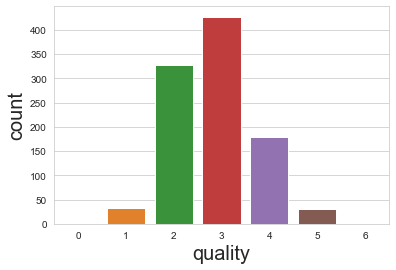

In [31]:
b =sns.countplot(x='quality',data=df_new)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)

In [32]:
count=0
for i in df.quality:
    if(i == 6):
        count+=1
    
print(count)

5


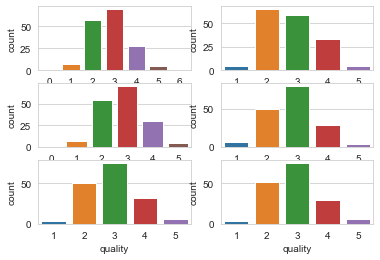

In [33]:

f, axes = plt.subplots(3, 2)
sns.countplot(x='quality',data=df_new[df_new["kfold"]==0],ax=axes[0,0])
sns.countplot(x='quality',data=df_new[df_new["kfold"]==1],ax=axes[0,1])
sns.countplot(x='quality',data=df_new[df_new["kfold"]==2],ax=axes[1,0])
sns.countplot(x='quality',data=df_new[df_new["kfold"]==3],ax=axes[1,1])
sns.countplot(x='quality',data=df_new[df_new["kfold"]==4],ax=axes[2,0])
sns.countplot(x='quality',data=df_new[df_new["kfold"]==5],ax=axes[2,1])
plt.show()

In [35]:
9

<generator object _BaseKFold.split at 0x0000026AFEA47430>